# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

combined_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")

combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [152]:
num_mice = combined_df["Mouse ID"].nunique()
num_mice

249

In [154]:
dup_mice_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID


array(['g989'], dtype=object)

In [156]:
dup_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [158]:
clean_df = combined_df[combined_df['Mouse ID'].isin(dup_mice_ID)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1


In [160]:
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [163]:
mean = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [165]:
stat = ['mean', 'median', 'var', 'std', 'sem']

summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

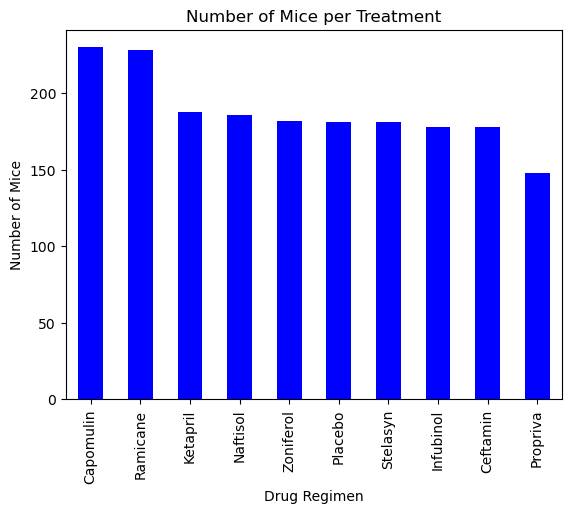

In [168]:
mice_count = clean_df["Drug Regimen"].value_counts()
plot_pandas = mice_count.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

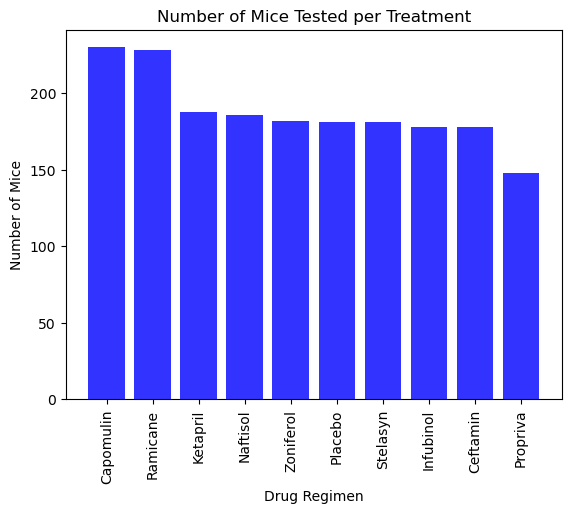

In [170]:
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()

<Axes: title={'center': 'Female vs. Male Mice'}>

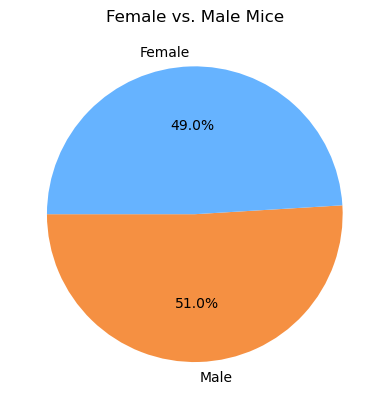

In [244]:
gender_data.plot(
    kind='pie',
    labels=gender_data.index,
    colors=['#f59042', '#66b3ff'],
    autopct='%1.1f%%',
    startangle=180,
    title='Female vs. Male Mice',
    ylabel='',  
)




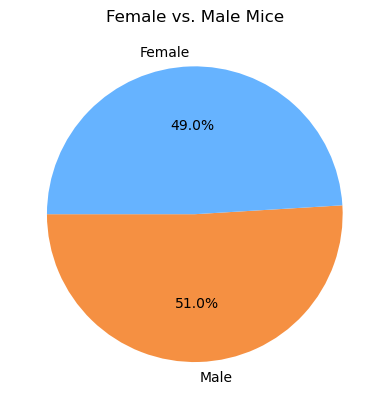

In [240]:
gender_data = clean_df["Sex"].value_counts()

labels = gender_data.index
sizes = gender_data.values
colors = ['#f59042','#66b3ff'] 

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)

plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [177]:
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID", "Timepoint"), how="left")

combined_last_timepoint_df = pd.concat([Capomulin_merge, Ramicane_merge, Infubinol_merge, Ceftamin_merge])

combined_last_timepoint_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [210]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = {treatment: [] for treatment in treatments}

for treatment in treatments:
    treatment_df = combined_last_timepoint_df.loc[combined_last_timepoint_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol_data[treatment] = treatment_df
    quartiles = treatment_df.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_df[(treatment_df < lower_bound) | (treatment_df > upper_bound)]
    print(f'{treatment} potential outliers: {outliers}')



Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


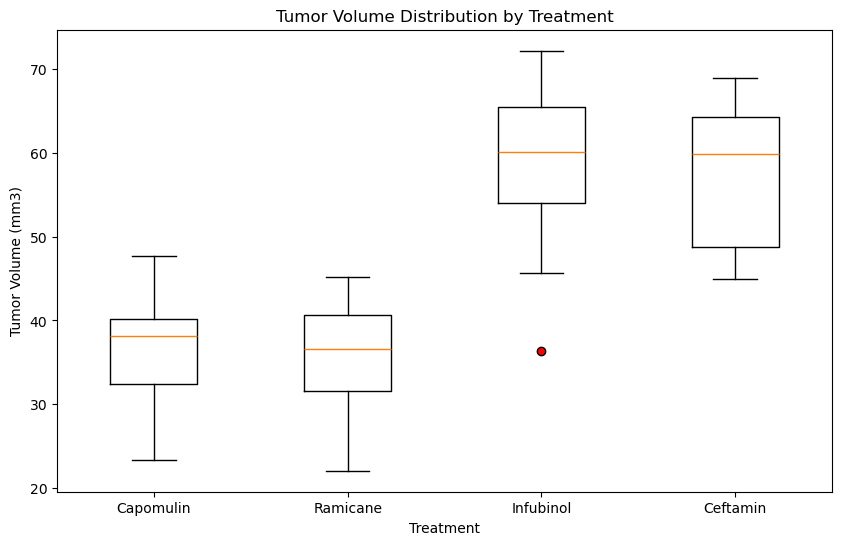

In [181]:
data_to_plot = [tumor_vol_data[treatment] for treatment in treatments]

fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data_to_plot, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))

ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

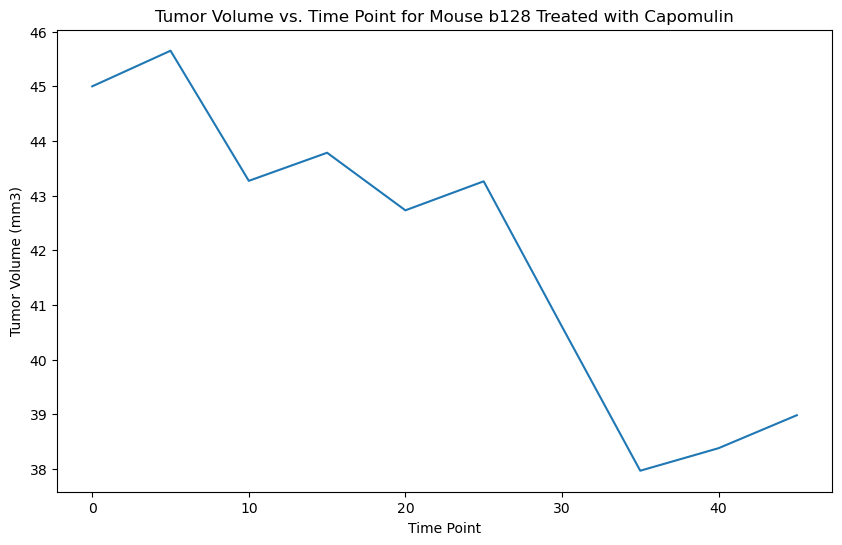

In [202]:
single_mouse_id = Capomulin_df['Mouse ID'].unique()[0]

single_mouse_data = Capomulin_df[Capomulin_df['Mouse ID'] == single_mouse_id]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])

ax.set_title(f'Tumor Volume vs. Time Point for Mouse {single_mouse_id} Treated with Capomulin')
ax.set_xlabel('Time Point')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

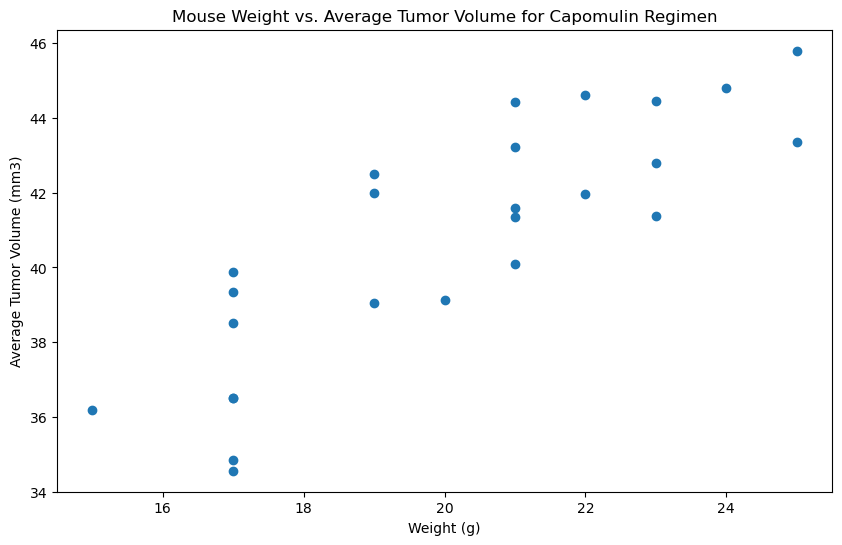

In [186]:
capomulin_avg_tumor_vol = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
capomulin_avg_tumor_vol = capomulin_avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

capomulin_merged_data = pd.merge(capomulin_avg_tumor_vol, mouse_metadata[['Mouse ID', 'Weight (g)']], on='Mouse ID')

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(capomulin_merged_data['Weight (g)'], capomulin_merged_data['Average Tumor Volume (mm3)'])

ax.set_title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


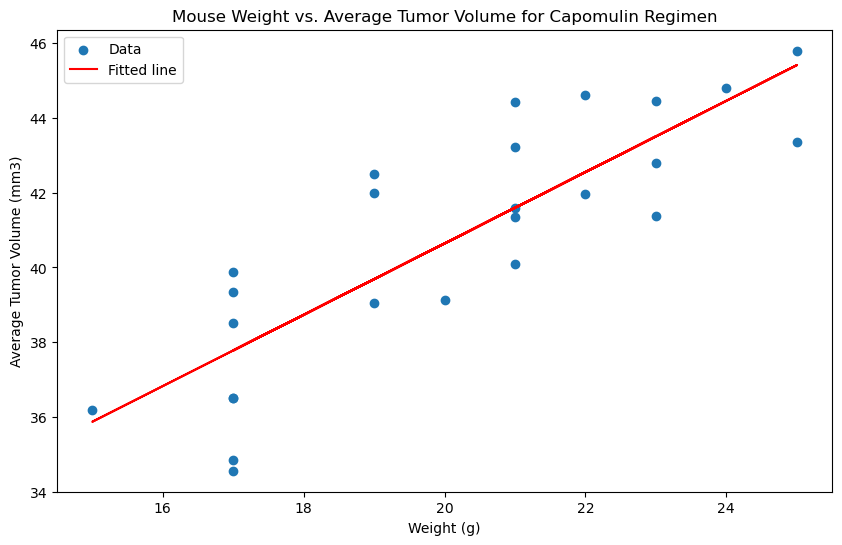

In [200]:
correlation_coefficient = capomulin_merged_data['Weight (g)'].corr(capomulin_merged_data['Average Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is: {correlation_coefficient:.2f}')

x = capomulin_merged_data['Weight (g)']
y = capomulin_merged_data['Average Tumor Volume (mm3)']

slope, intercept = np.polyfit(x, y, 1)

regression_line = slope * x + intercept

ss_res = np.sum((y - regression_line) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

n = len(x)
std_err = np.sqrt(ss_res / (n - 2))

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, label='Data')
ax.plot(x, regression_line, color='red', label='Fitted line')

ax.set_title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.legend()
plt.show()